In [3]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import scipy.io as sio
import pprint as pp
import numpy as np
import os
import re
import gc

In [4]:
mdir = '/sanssauvegarde/homes/v18porti/info/Brest_Samples/'

In [5]:
mat = sio.loadmat(mdir + 'RS10000/RS10000_170623_103140.mat')
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jun 19 14:08:51 2019',
 '__version__': '1.0',
 'patient': array([[(array([[array([[(array([[3.68878077e-36],
        [9.90956159e-36],
        [1.16979072e-35],
        ...,
        [9.91645269e-04],
        [1.00473734e-03],
        [1.02052640e-03]]), array([[-1.],
        [-1.],
        [-1.],
        ...,
        [-1.],
        [-1.],
        [-1.]], dtype=float32), array([[0.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [2.]], dtype=float32), array([[-7.99673483e-09],
        [ 1.28547427e-07],
        [ 4.05955632e-07],
        ...,
        [-1.44321394e+01],
        [-1.44408379e+01],
        [-1.44438744e+01]]), array([[0.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.        ],
        [0.02365523],
        [0.        ]], dtype=float32), array([[1.1357461e-01],
        [6.0807583e-06],
        [1.7956213e-11],
        ...

In [60]:
patient_struct = mat['patient']
pp.pprint(patient_struct.shape)
pp.pprint(patient_struct.dtype)
patient_struct

(1, 1)
dtype([('voie', 'O')])


array([[(array([[array([[(array([[3.68878077e-36],
       [9.90956159e-36],
       [1.16979072e-35],
       ...,
       [9.91645269e-04],
       [1.00473734e-03],
       [1.02052640e-03]]), array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]], dtype=float32), array([[-7.99673483e-09],
       [ 1.28547427e-07],
       [ 4.05955632e-07],
       ...,
       [-1.44321394e+01],
       [-1.44408379e+01],
       [-1.44438744e+01]]), array([[0.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.        ],
       [0.02365523],
       [0.        ]], dtype=float32), array([[1.1357461e-01],
       [6.0807583e-06],
       [1.7956213e-11],
       ...,
       [3.0981528e-02],
       [2.5095909e-03],
       [3.9894603e-05]], dtype=float32), array([[2.2880688e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [

In [61]:
voie = patient_struct[0, 0]['voie']
pp.pprint(voie.shape)
pp.pprint(voie.dtype)
voie

(1, 2)
dtype('O')


array([[array([[(array([[3.68878077e-36],
       [9.90956159e-36],
       [1.16979072e-35],
       ...,
       [9.91645269e-04],
       [1.00473734e-03],
       [1.02052640e-03]]), array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]], dtype=float32), array([[-7.99673483e-09],
       [ 1.28547427e-07],
       [ 4.05955632e-07],
       ...,
       [-1.44321394e+01],
       [-1.44408379e+01],
       [-1.44438744e+01]]), array([[0.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.        ],
       [0.02365523],
       [0.        ]], dtype=float32), array([[1.1357461e-01],
       [6.0807583e-06],
       [1.7956213e-11],
       ...,
       [3.0981528e-02],
       [2.5095909e-03],
       [3.9894603e-05]], dtype=float32), array([[2.2880688e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [2.7716389

In [73]:
# voie will have a shape of (1, n), where n # of info inside
n = (voie.shape)[1]
# ...
voie_1 = voie[0,0] # [0, n]
pp.pprint(voie_1.shape)
pp.pprint(voie_1.dtype)
voie_1

(1, 1)
dtype([('vectorFiltSignal', 'O'), ('vectorComeBackTime', 'O'), ('vectorInitState', 'O'), ('vectorDetSignal', 'O'), ('mpCorrRes', 'O'), ('mpAmpFRes', 'O'), ('mpAmpUFRes', 'O'), ('mpCorrRes_brut', 'O'), ('mpCount', 'O'), ('mpTimeRRRes', 'O'), ('mpAlphaOKRes', 'O'), ('mpBetaOKRes', 'O'), ('mpMuOKRes', 'O'), ('mpAlphaNOKRes', 'O'), ('mpBetaNOKRes', 'O'), ('mpMuNOKRes', 'O'), ('mpAlphaOKGammaRes', 'O'), ('mpBetaOKGammaRes', 'O'), ('mpAlphaNOKGammaRes', 'O'), ('mpBetaNOKGammaRes', 'O'), ('mpAlphaOKGammaRRRes', 'O'), ('mpBetaOKGammaRRRes', 'O'), ('mpAlphaNOKGammaRRRes', 'O'), ('mpBetaNOKGammaRRRes', 'O'), ('mpAlphaOKBetaRes', 'O'), ('mpBetaOKBetaRes', 'O'), ('mpAlphaNOKBetaRes', 'O'), ('mpBetaNOKBetaRes', 'O'), ('vectorMobility', 'O'), ('vectorOKAnnotRes', 'O'), ('vectorCorrKLD', 'O'), ('vectorUFAmpKLD', 'O'), ('vectorFAmpKLD', 'O'), ('vectorRRKLD', 'O')])


array([[(array([[3.68878077e-36],
       [9.90956159e-36],
       [1.16979072e-35],
       ...,
       [9.91645269e-04],
       [1.00473734e-03],
       [1.02052640e-03]]), array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]], dtype=float32), array([[-7.99673483e-09],
       [ 1.28547427e-07],
       [ 4.05955632e-07],
       ...,
       [-1.44321394e+01],
       [-1.44408379e+01],
       [-1.44438744e+01]]), array([[0.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.        ],
       [0.02365523],
       [0.        ]], dtype=float32), array([[1.1357461e-01],
       [6.0807583e-06],
       [1.7956213e-11],
       ...,
       [3.0981528e-02],
       [2.5095909e-03],
       [3.9894603e-05]], dtype=float32), array([[2.2880688e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [2.7716389e-09],
 

In [95]:
data = voie_1[0, 0]
label = (voie_1.dtype).names

In [99]:
voie_1[label[0]]

array([[array([[3.68878077e-36],
       [9.90956159e-36],
       [1.16979072e-35],
       ...,
       [9.91645269e-04],
       [1.00473734e-03],
       [1.02052640e-03]])]], dtype=object)

In [6]:
def getPatientStruct(mat_file):
    return mat_file['patient']

def getVoie(patient):
    return patient[0, 0]['voie']

# voie will have a shape of (1, n), where n # of info inside range(0,n-1)
def getVoieInfo(voie, n):
    voie_n = voie[0,n]
    return voie_n[0, 0]

def getLabels(voie, n):
    voie_n = voie[0,n]
    return (voie_n.dtype).names

def createDir(d):
    if not os.path.exists(d):
        os.makedirs(d)

In [7]:
def isStartStringMatched(s, m):
    return re.match(m + '.+', s)

def studyData(mat_dir):
    for dir_path in os.listdir(mat_dir):
        if isStartStringMatched(dir_path, 'RS'):
            for file_path in os.listdir(mat_dir + dir_path):
                 if file_path.endswith(".mat"):
                    print(file_path)
                    # do analysis
    
studyData(mdir)

RS10000_170623_103140.mat
RS10001_170503_100212.mat
RS10002_170119_175122.mat
RS10003_170119_135122.mat
RS10004_170214_100711.mat
RS10005_170117_151052.mat
RS10006_170509_121747.mat
RS10006_170512_105550.mat
RS10007_170425_101941.mat
RS10007_170426_155734.mat
RS10008_170516_101313.mat
RS10008_170516_141313.mat
RS10008_170516_171902.mat
RS10009_170113_142348.mat
RS10010_170607_102733.mat


In [8]:
ps = getPatientStruct(mat)
vo = getVoie(ps)
n = (vo.shape)[1]
print(n)
labels = getLabels(vo, 0)

2


In [9]:
labels

('vectorFiltSignal',
 'vectorComeBackTime',
 'vectorInitState',
 'vectorDetSignal',
 'mpCorrRes',
 'mpAmpFRes',
 'mpAmpUFRes',
 'mpCorrRes_brut',
 'mpCount',
 'mpTimeRRRes',
 'mpAlphaOKRes',
 'mpBetaOKRes',
 'mpMuOKRes',
 'mpAlphaNOKRes',
 'mpBetaNOKRes',
 'mpMuNOKRes',
 'mpAlphaOKGammaRes',
 'mpBetaOKGammaRes',
 'mpAlphaNOKGammaRes',
 'mpBetaNOKGammaRes',
 'mpAlphaOKGammaRRRes',
 'mpBetaOKGammaRRRes',
 'mpAlphaNOKGammaRRRes',
 'mpBetaNOKGammaRRRes',
 'mpAlphaOKBetaRes',
 'mpBetaOKBetaRes',
 'mpAlphaNOKBetaRes',
 'mpBetaNOKBetaRes',
 'vectorMobility',
 'vectorOKAnnotRes',
 'vectorCorrKLD',
 'vectorUFAmpKLD',
 'vectorFAmpKLD',
 'vectorRRKLD')

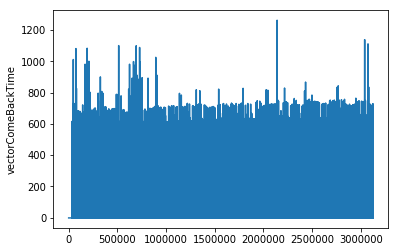

"mat = sio.loadmat(mdir + 'RS10001/RS10001_170503_100212.mat')\nps = getPatientStruct(mat)\nvo = getVoie(ps)\nn = (vo.shape)[1]\nprint(n)\ninfo = getVoieInfo(vo, 0)\nplt.plot(info[labels[1]])\nplt.ylabel(labels[1])\nplt.show()"

In [11]:
"""info = getVoieInfo(vo, 0)
plt.plot(info[labels[1]])
plt.ylabel(labels[1])
plt.show()"""
info = getVoieInfo(vo, 1)
plt.plot(info[labels[1]])
plt.ylabel(labels[1])
plt.xticks(fontsize=10)
plt.show()
"""mat = sio.loadmat(mdir + 'RS10001/RS10001_170503_100212.mat')
ps = getPatientStruct(mat)
vo = getVoie(ps)
n = (vo.shape)[1]
print(n)
info = getVoieInfo(vo, 0)
plt.plot(info[labels[1]])
plt.ylabel(labels[1])
plt.show()"""

0


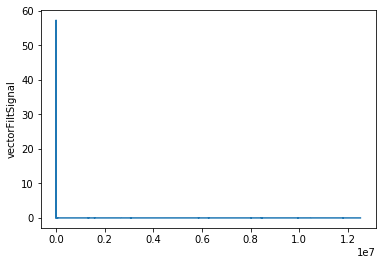

1


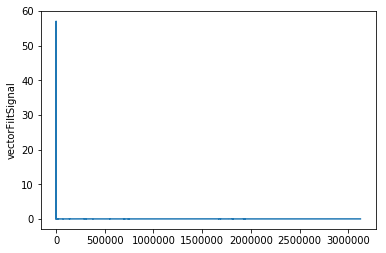

0


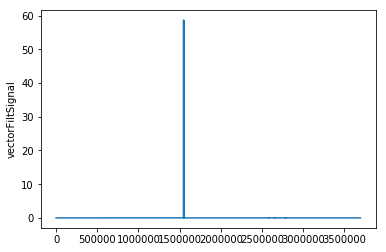

1


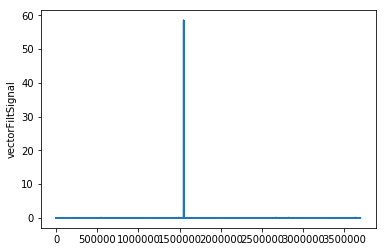

2


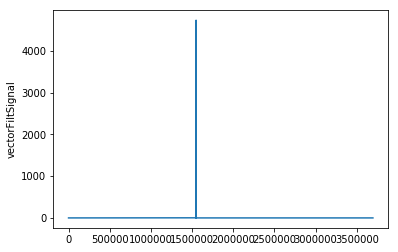

0


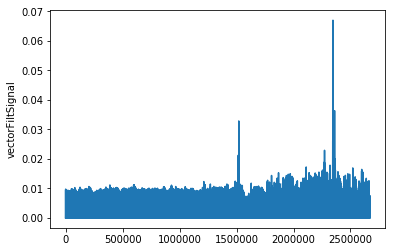

1


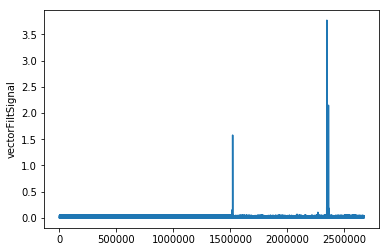

2


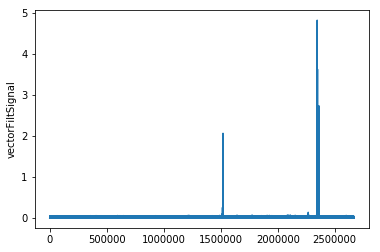

In [11]:
def studyLabelInFiles(mat_dir, labels, label, total, starting):
    cnt = 0
    fcnt = 0
    for dir_path in os.listdir(mat_dir):
        if isStartStringMatched(dir_path, 'RS'):
            for file_path in os.listdir(mat_dir + dir_path):
                if file_path.endswith(".mat"):
                    mat = sio.loadmat(mdir + dir_path + '/' + file_path)
                    ps = getPatientStruct(mat)
                    vo = getVoie(ps)
                    n = (vo.shape)[1]
                    for i in range(n):
                        if fcnt < starting: fcnt += 1; continue
                        if cnt >= total: return 
                        else: cnt += 1
                        info = getVoieInfo(vo, i)
                        print(i)
                        plt.plot(info[label])
                        plt.ylabel(label)
                        plt.show()
                        
                    
studyLabelInFiles(mdir, labels, 'vectorFiltSignal', 8, 0)

In [9]:
def showDiffLabels(labels, voie, n):
    for label in labels:
        info = getVoieInfo(voie, n)
        plt.figure()
        plt.plot(info[label])
        plt.ylabel(label)
        plt.show()        
        
showDiffLabels(labels, vo, 0)

In [ ]:
def printDiffLabels(labels, voie, n):
    for label in labels:
        info = getVoieInfo(voie, n)
        plt.figure()
        plt.plot(info[label])
        plt.ylabel(label)
        plt.savefig('./output/one-pat/' + label + '.eps')
        plt.clf()
        plt.close()
        
printDiffLabels(labels, vo, 0)

<IPython.core.display.Javascript object>


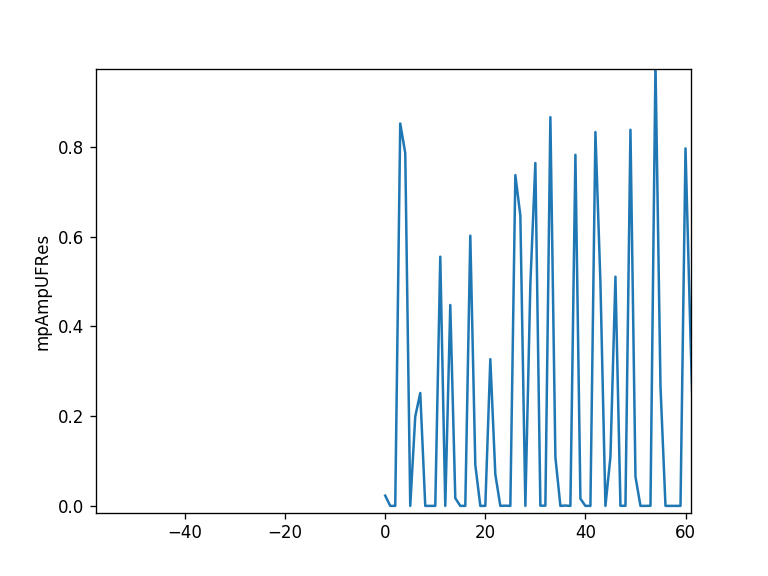

In [9]:
info = getVoieInfo(vo, 0)
plt.plot(info['mpAmpUFRes'])
plt.ylabel('mpAmpUFRes')
plt.show()

RS10000 - 0
RS10000 - 1


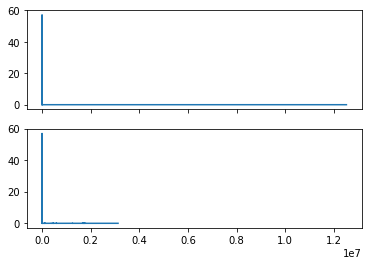

In [11]:
def printOneVariableForAllPatients(mat_dir, labels, label, start, total):
    cnt = 0
    fcnt = 0
    for dir_path in os.listdir(mat_dir):
        if isStartStringMatched(dir_path, 'RS'):
            for file_path in os.listdir(mat_dir + dir_path):
                 if file_path.endswith(".mat"):
                    mat = sio.loadmat(mdir + dir_path + '/' + file_path)
                    ps = getPatientStruct(mat)
                    vo = getVoie(ps)
                    n = (vo.shape)[1]
                    if fcnt < start: fcnt += n; continue
                    fig, axs = plt.subplots(n, sharex=True) #, sharey=True)
                    for i in range(n):
                        #if fcnt < start: fcnt += 1; continue
                        if cnt >= total: continue 
                        else: cnt += 1
                        print(dir_path + ' - ' + str(i))
                        info = getVoieInfo(vo, i)
                        # print
                        axs[i].plot(info[label])
                        """plt.subplot(n, 1, i+1)
                        plt.plot(info[label])
                        plt.xticks(fontsize=7)"""
                    plt.savefig('./output/' + label + file_path.split('.')[0] + '.jpg')
                    plt.savefig('./output/' + label + file_path.split('.')[0] + '.tif')
                    plt.savefig('./output/' + label + file_path.split('.')[0] + '.png')
                    plt.savefig('./output/' + label + file_path.split('.')[0] + '.rgba')
                    if cnt >= total: return 
                        
printOneVariableForAllPatients(mdir, labels, 'vectorFiltSignal', 0, 2)